In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"madhumithacse","key":"98f3883d5dfd0a2b6e510f51b9ce99f0"}'}

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d aryansinghal10/alzheimers-multiclass-dataset-equal-and-augmented


!unzip alzheimers-multiclass-dataset-equal-and-augmented.zip

Streaming output truncated to the last 5000 lines.
  inflating: combined_images/VeryMildDemented/a231fefc-359b-40fc-b6aa-db4c3f3b51ac.jpg  
  inflating: combined_images/VeryMildDemented/a2479682-1520-4d4b-a819-0516809393db.jpg  
  inflating: combined_images/VeryMildDemented/a252d5dd-3e86-42c4-83bb-52031cf5b9ff.jpg  
  inflating: combined_images/VeryMildDemented/a2612e5a-c1f2-4781-803c-a6b471ded1b5.jpg  
  inflating: combined_images/VeryMildDemented/a261d715-f3f3-4e30-842a-2e5441f00955.jpg  
  inflating: combined_images/VeryMildDemented/a27aeaaf-b37f-4e15-ab3b-064daa19355b.jpg  
  inflating: combined_images/VeryMildDemented/a27da9a4-1ed4-493f-af81-dd8a3c8adda2.jpg  
  inflating: combined_images/VeryMildDemented/a280d3f6-c18d-424e-8f51-e924f5392c74.jpg  
  inflating: combined_images/VeryMildDemented/a28780ec-8fc0-4d55-9596-0ae2663c6da4.jpg  
  inflating: combined_images/VeryMildDemented/a293bcd0-b371-4120-a3b5-f8c763b0fa95.jpg  
  inflating: combined_images/VeryMildDemented/a296a0bd-4784

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
Img_size=224
Batch_size=32

In [6]:
train_datagen=ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [10]:
train_generator = train_datagen.flow_from_directory('/content/combined_images',target_size=(Img_size,Img_size),batch_size=Batch_size,class_mode='categorical',subset='training')
val_generator = train_datagen.flow_from_directory('/content/combined_images',target_size=(Img_size,Img_size),batch_size=Batch_size,class_mode='categorical',subset='validation')

Found 35200 images belonging to 4 classes.
Found 8800 images belonging to 4 classes.


In [11]:
class_indices = train_generator.class_indices
print(class_indices)
class_names = list(train_generator.class_indices.keys())
print(class_names)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [12]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',input_shape=(Img_size, Img_size, 3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(4, activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_generator,epochs = 5, validation_data = val_generator, batch_size = Batch_size,)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1100/1100 ━━━━━━━━━━━━━━━━━━━━ 75s 63ms/step - accuracy: 0.5759 - loss: 1.0022 - val_accuracy: 0.8124 - val_loss: 0.4542
Epoch 2/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 74s 60ms/step - accuracy: 0.8556 - loss: 0.3550 - val_accuracy: 0.8717 - val_loss: 0.3120
Epoch 3/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 66s 60ms/step - accuracy: 0.9238 - loss: 0.1865 - val_accuracy: 0.8889 - val_loss: 0.2716
Epoch 4/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9582 - loss: 0.1115 - val_accuracy: 0.8950 - val_loss: 0.2700
Epoch 5/5
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 67s 61ms/step - accuracy: 0.9754 - loss: 0.0719 - val_accuracy: 0.8956 - val_loss: 0.3414


In [14]:
model.save('/content/drive/MyDrive/MultiClass_Alzheimer/Alzheimer.h5')

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/MultiClass_Alzheimer/Alzheimer.h5')
print('model loaded')

model loaded


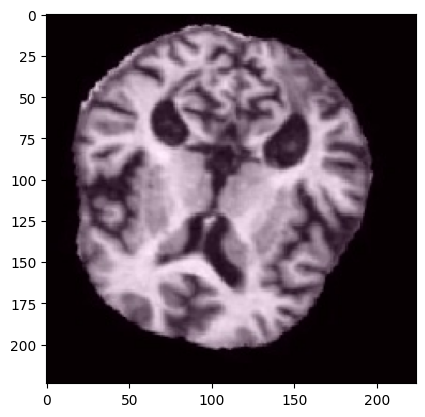

In [18]:
test_image_path="/content/0015bdfc-2059-4195-8eff-9c5cf2e2c025.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [19]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255

In [20]:
import numpy as np
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.23636821 0.26322743 0.26110196 0.2393024 ]]


In [21]:
ind=np.argmax(prediction)
print(class_names[ind])

ModerateDemented
